# Logistic Regression Consulting Project

## Binary Customer Churn

A marketing agency has many customers that use their service to produce ads for the client/customer websites. They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.

The data is saved as customer_churn.csv. Here are the fields and their definitions:

    Name : Name of the latest contact at Company
    Age: Customer Age
    Total_Purchase: Total Ads Purchased
    Account_Manager: Binary 0=No manager, 1= Account manager assigned
    Years: Totaly Years as a customer
    Num_sites: Number of websites that use the service.
    Onboard_date: Date that the name of the latest contact was onboarded
    Location: Client HQ Address
    Company: Name of Client Company
    
Once you've created the model and evaluated it, test out the model on some new data (you can think of this almost like a hold-out set) that your client has provided, saved under new_customers.csv. The client wants to know which customers are most likely to churn given this data (they don't have the label yet).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [173]:
df = pd.read_csv('customer_churn.csv')
df.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1


In [174]:
# drop column Names, Location and Company
# removing the columns that are not needed for the model building
# only numerical data is needed for the model building

df.drop(['Names','Location','Company', 'Onboard_date'],axis=1,inplace=True)

In [175]:
# datatypes of columns
df.dtypes

Age                float64
Total_Purchase     float64
Account_Manager      int64
Years              float64
Num_Sites          float64
Churn                int64
dtype: object

In [176]:
# sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))


In [177]:
# cost function
def costFunction(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    error = (y*np.log(h) + (1-y)*np.log(1-h))
    cost = -1/m * sum(error)
    grad = 1/m * X.T.dot(h-y)
    return cost, grad


In [178]:
# gradient descent
def gradientDescent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        cost, grad = costFunction(X, y, theta)
        theta -= alpha * grad
        cost_history[i] = cost
    return theta, cost_history


In [179]:
# predict function
def predict(X, theta):
    return sigmoid(X.dot(theta))

In [180]:
# accuracy function
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [181]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], test_size=0.2, random_state=42)

In [182]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [183]:
# add intercept
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]


In [184]:
# train model
theta, cost_history = gradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), alpha=0.01, iterations=1000)


Text(0.5, 1.0, 'Cost history')

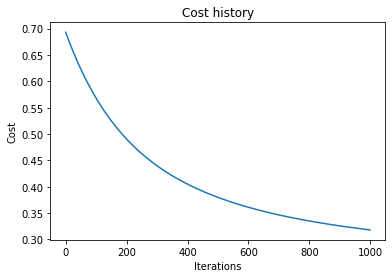

In [185]:
# plot cost history
plt.plot(range(1000), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost history')


In [186]:
# predict
y_pred = predict(X_test, theta)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]


In [187]:
# accuracy
accuracy(y_test, y_pred)*100

88.88888888888889

In [188]:
df2 = pd.read_csv('new_customers_1.csv')
df2.head(2)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,38612 Johnny Stravenue Nataliebury WI 15717-8316,King Ltd
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport ME ...",Cannon-Benson


In [189]:
df2.drop(['Names','Location','Company', 'Onboard_date'],axis=1,inplace=True)

In [190]:
df2

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
0,37.0,9935.53,1,7.71,8.0
1,23.0,7526.94,1,9.28,15.0
2,65.0,100.00,1,1.00,15.0
3,32.0,6487.50,0,9.40,14.0
4,32.0,13147.71,1,10.00,8.0
5,22.0,8445.26,1,3.46,14.0


In [191]:
# apply prediction on new data
X_new = scaler.transform(df2)
X_new = np.c_[np.ones((X_new.shape[0], 1)), X_new]
y_pred_new = predict(X_new, theta)
y_pred_new = [1 if i > 0.5 else 0 for i in y_pred_new]
y_pred_new

# insert prediction into dataframe
df2['Churn'] = y_pred_new
df2

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,37.0,9935.53,1,7.71,8.0,0
1,23.0,7526.94,1,9.28,15.0,1
2,65.0,100.00,1,1.00,15.0,1
3,32.0,6487.50,0,9.40,14.0,1
4,32.0,13147.71,1,10.00,8.0,0
5,22.0,8445.26,1,3.46,14.0,1
